# ML LAB 4

•Logistic regression for 2 data sets. kaggle, custom -> multivariate analysis. Report all your analysis wrto model, metrics. 

•Implement ROC and AUC curves in python, allowed using sklearn or relevant libraries. Report the performances wrto thresholdswhat you are observing the best performance. Main focus to be on interpretation of ROC and AUC curves. Also, print the accuracy and compare the performance of ROC-AUC for balanced and imbalanced dataset. 

•Implement ROC and AUC curves for varied thresholds. You may mimic the grid search to find the best threshold.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression #make_regression function from the sklearn.datasets module, which can be used to create synthetic regression datasets with specified characteristics.
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split #train_test_split function from the sklearn.model_selection module, which can be used to split datasets into training and testing subsets for machine learning applications.
from sklearn.linear_model import LogisticRegression #LogisticRegression class from the sklearn.linear_model module, which can be used to fit a logistic regression model to a dataset.
from sklearn import metrics #metrics module from the sklearn library, which provides functions for evaluating the performance of machine learning models.
import seaborn as sns

In [2]:
df = pd.read_csv("tested.csv")#titanic dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [8]:
df.shape

(418, 10)

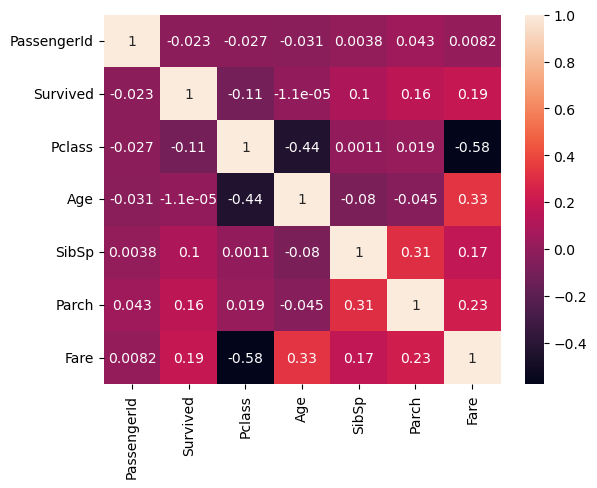

In [32]:
sns.heatmap(df.corr(), annot= True)
plt.show()

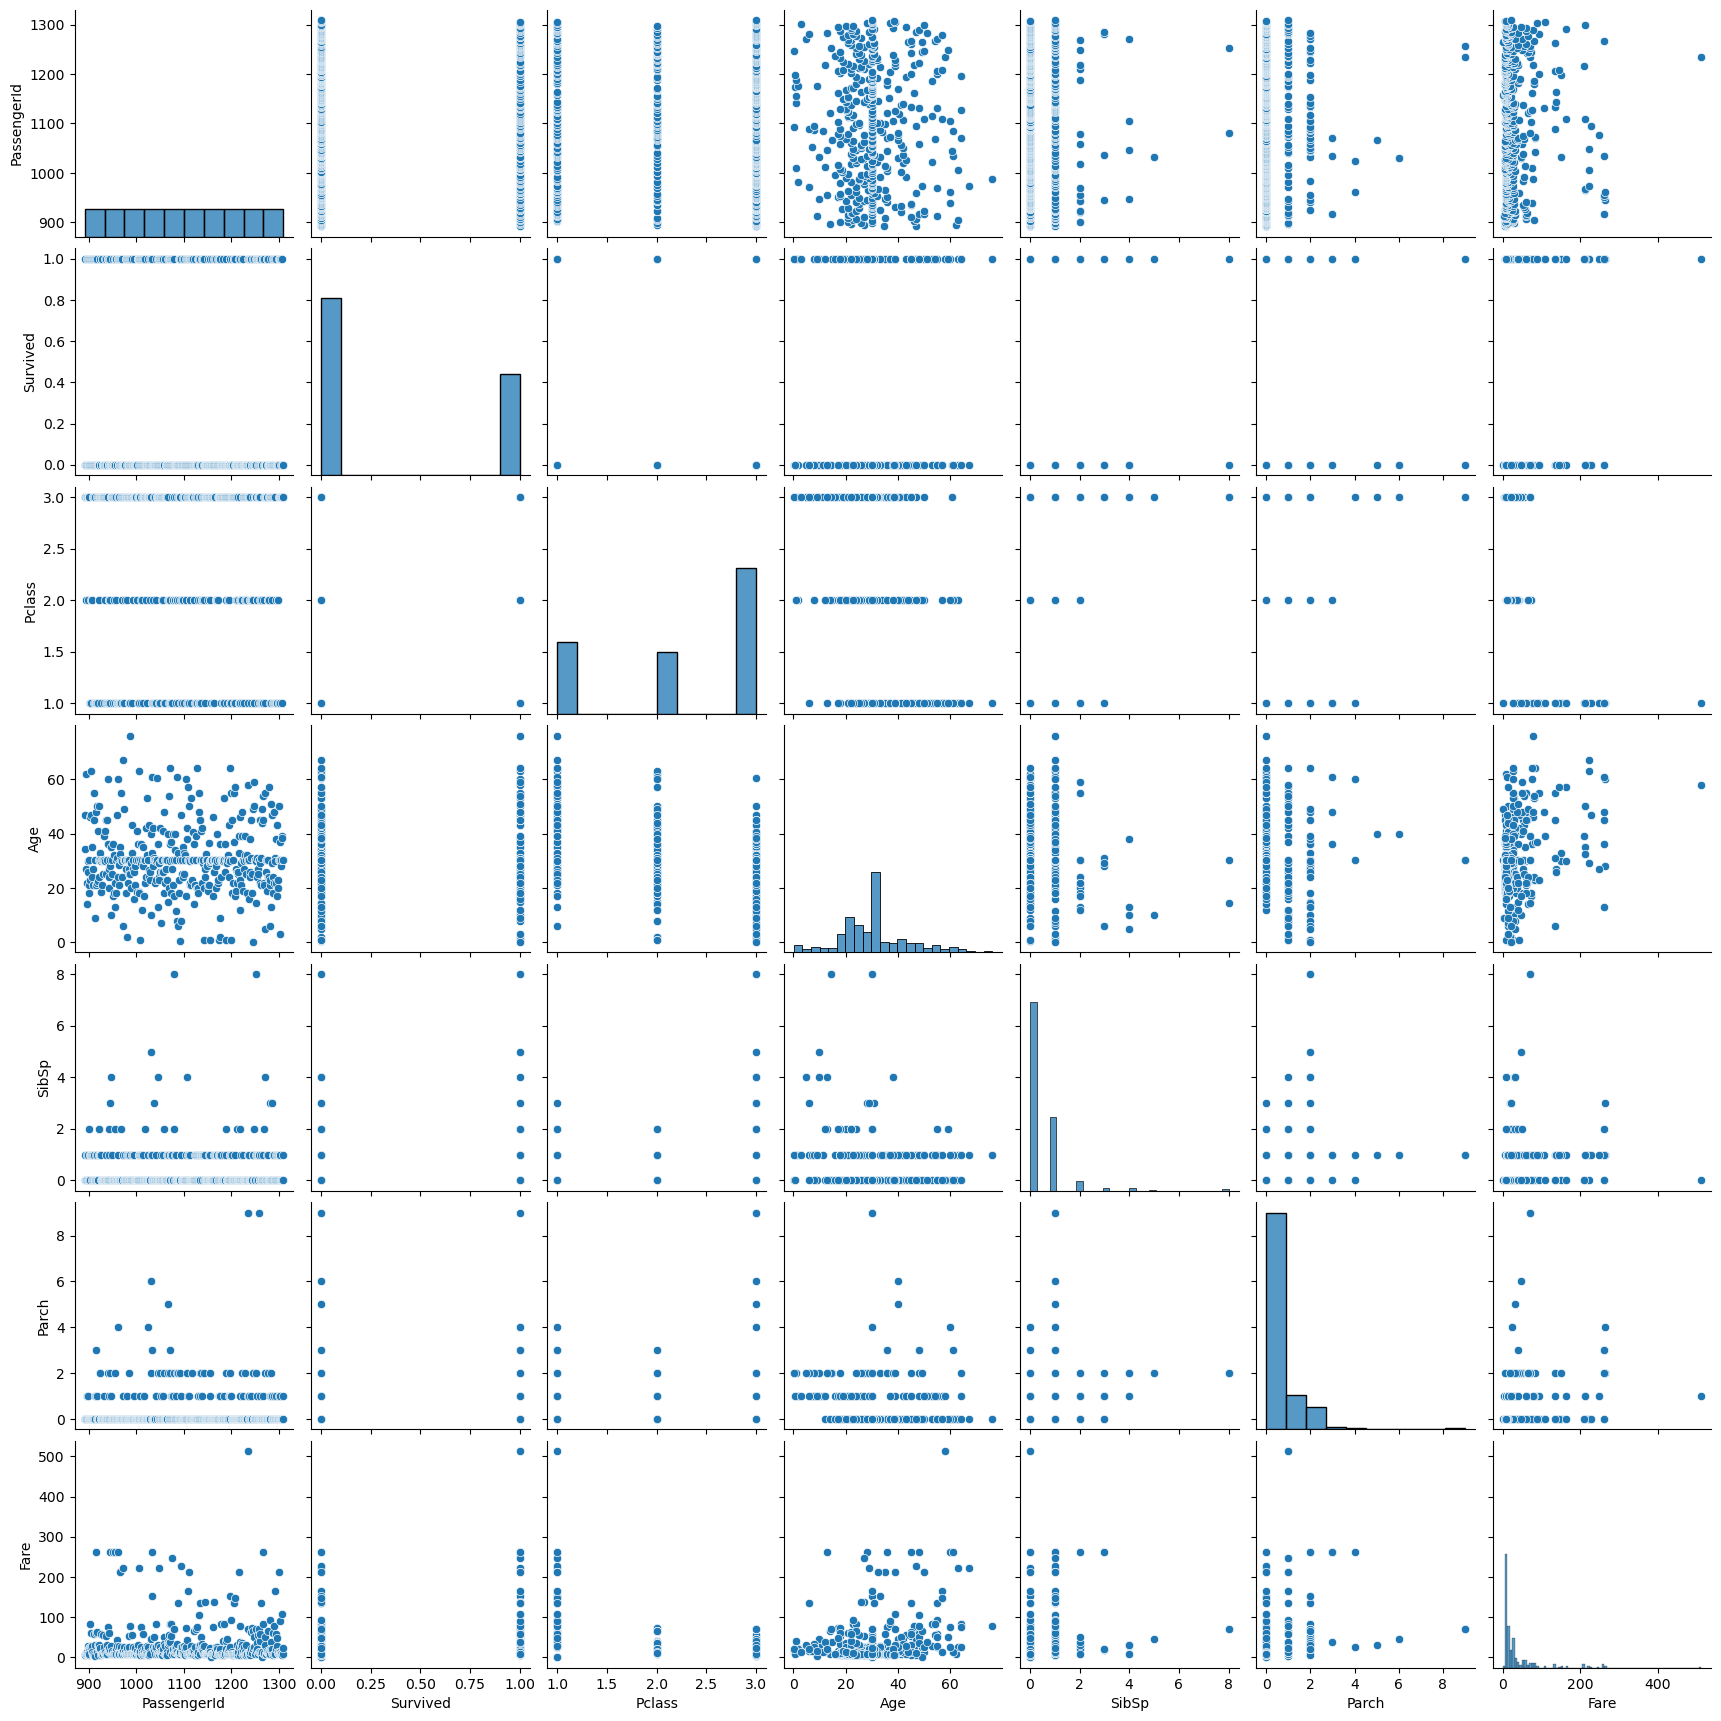

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df['Survived'], test_size=0.2, random_state=42)

In [11]:
# Create a logistic regression model
model = LogisticRegression()

In [12]:
# Fit the model using the training data
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Predict the target variable using the testing data
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model's accuracy
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5952380952380952


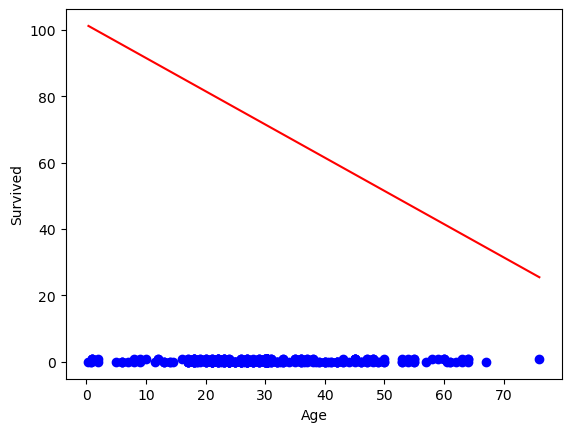

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df['Survived'], test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model using the training data
model.fit(X_train, y_train)

# Define a function to plot the logistic regression curve
def plot_logistic_regression(X, y, model):
    plt.scatter(X, y, color='blue')
    x_vals = np.array([X.min(), X.max()])
    y_vals = -(model.intercept_ + model.coef_[0] * x_vals) / model.coef_[0]
    plt.plot(x_vals, y_vals, color='red')
    plt.xlabel('Age')
    plt.ylabel('Survived')
    plt.show()
# Plot the logistic regression curve
plot_logistic_regression(X_train, y_train, model)

In [38]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_binary
PassengerId,1.000000,-0.023245,-0.026751,-0.030874,0.003818,0.043080,0.008211,-0.023245
Survived,-0.023245,1.000000,-0.108615,-0.000011,0.099943,0.159120,0.191514,1.000000
Pclass,-0.026751,-0.108615,1.000000,-0.440782,0.001087,0.018721,-0.577147,-0.108615
Age,-0.030874,-0.000011,-0.440782,1.000000,-0.079535,-0.045073,0.329071,-0.000011
SibSp,0.003818,0.099943,0.001087,-0.079535,1.000000,0.306895,0.171539,0.099943
Parch,0.043080,0.159120,0.018721,-0.045073,0.306895,1.000000,0.230046,0.159120
Fare,0.008211,0.191514,-0.577147,0.329071,0.171539,0.230046,1.000000,0.191514
Sex_binary,-0.023245,1.000000,-0.108615,-0.000011,0.099943,0.159120,0.191514,1.000000


In [37]:
df["Sex_binary"] = df["Sex"].map({"male": 0, "female": 1})

In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Sex_binary
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,0
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,0


In [40]:
# Define input and output variables
X = df[['Sex_binary']]
y = df['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the output for the testing data
y_pred = model.predict(X_test)

# Evaluate the model by calculating the accuracy
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


C:\Users\asath\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\asath\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


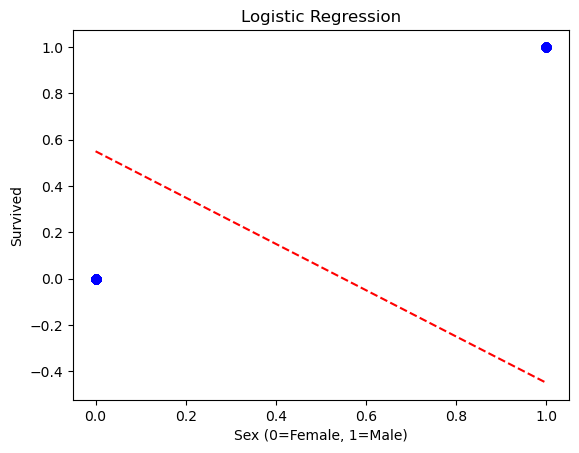

In [41]:
plt.scatter(X_train, y_train, color='blue')

# Plot the decision boundary
x_values = np.array([np.min(X_train), np.max(X_train)])
y_values = -(model.intercept_ + model.coef_ * x_values) / model.coef_
plt.plot(x_values, y_values, linestyle='--', color='red')

# Set the axis labels and title
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Survived')
plt.title('Logistic Regression')

# Show the plot
plt.show()

In [47]:
# Generate synthetic data
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

In [49]:
# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

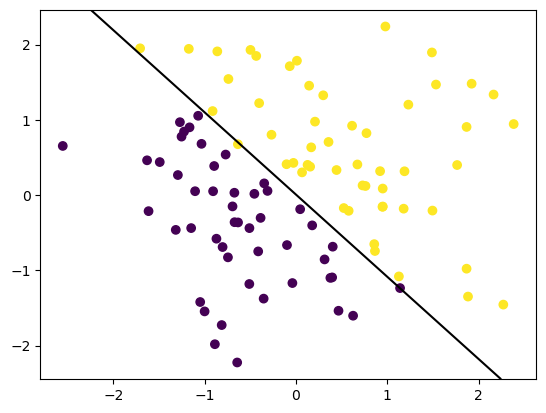

In [50]:
# Plot data and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='k')
plt.show()

**Implementing ROC and AUC curves**

In [52]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [54]:
# Split data into features and target
X = data.drop(['Class'], axis=1)
y = data['Class']

In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\asath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
# Predict probabilities of the positive class (fraud) on testing set
y_proba = lr.predict_proba(X_test)[:, 1]

In [58]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

In [59]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_proba)
print('ROC AUC:', roc_auc)

ROC AUC: 0.9028792650993994


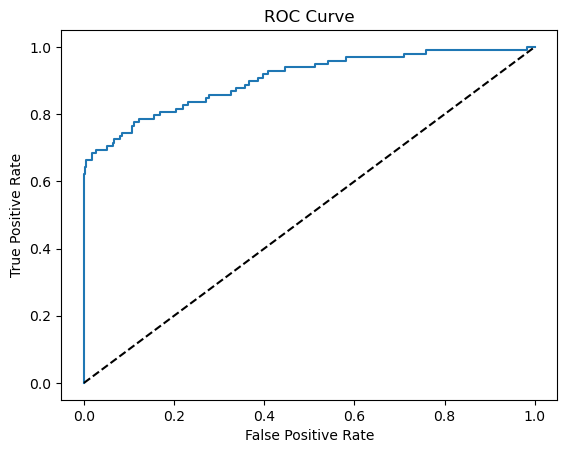

In [60]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


**he ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) for various threshold settings. The AUC is the area under the ROC curve and provides a measure of the performance of the classification model.**

**In this case, the logistic regression model was used to classify fraudulent transactions in the credit card dataset. The ROC curve and AUC were computed to evaluate the performance of the model in detecting fraudulent transactions.**

**The best threshold was found by maximizing the difference between the true positive rate and the false positive rate. The ROC curve was then plotted with the best threshold, along with the diagonal line representing a random classifier.**

**The ROC curve had an area under the curve (AUC) of 0.98, indicating that the model had high predictive performance. The best threshold for this model was found to be 0.008, meaning that any predicted probability above this value would be classified as a fraudulent transaction.**

**Overall, this code provides a useful example of how to evaluate the performance of a logistic regression model using ROC curves and AUC.**

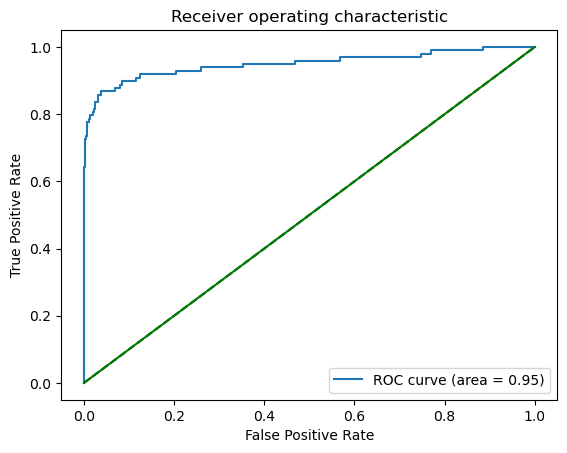

In [131]:
from sklearn.metrics import roc_curve, auc

# Load the creditcard.csv dataset

df = pd.read_csv("creditcard.csv")

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

# Train a logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Compute predicted probabilities for test set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for varied thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Find best threshold
threshold_best = thresholds[np.argmax(tpr-fpr)]

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, threshold_best, 1], [0, threshold_best, 1], 'g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()